#### 导入相关依赖包

In [1]:
FILE_NAME = 'result_20190921.xlsx'
SHEET_NAME = 'Sheet1'
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#### 数据预处理

In [2]:
import os
path = 'data' + os.sep + FILE_NAME
pdData = pd.read_excel(path, sheet_name=SHEET_NAME)
# 数据预处理
pdData = pdData.dropna(axis = 0,how='any')
pdData = pdData.drop(['URL', 'Xpath', 'Completeness', 'RoomClass', 'RoomType', 'RoomSize', 'BedType', 'Wheelchair', 'Smoking', 'View', 'ExtraAttributes', 'Score'], axis=1)
pdData['ActualCompleteness'] = pdData['ActualCompleteness'].map(lambda x: x*0.9)
pdData['Purity'] = pdData['Purity'].map(lambda x: x*0.6) 
pdData['CompletenessGain'] = pdData['CompletenessGain'].map(lambda x: x*0.7) 
pdData['NumberOfRooms'] = pdData['NumberOfRooms'].map(lambda x: x*0.8) 
pdData.shape

(3039, 5)

#### 数据进行划分

In [3]:
from sklearn.model_selection import train_test_split
X = pdData.loc[:, pdData.columns != 'Admitted']
y = pdData.loc[:, pdData.columns == 'Admitted']
# 对数据进行切分
train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                            y, 
                                                                            test_size=0.25, 
                                                                            random_state=0)

#### 导入决策树 并训练训练数据

In [4]:
# 导入决策树并实例化
from sklearn import tree
# 树的深度最大为 2
dtr = tree.DecisionTreeRegressor(max_depth = 3)
dtr.fit(train_features, train_labels)

dtr.score(test_features, test_labels)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### 数据可视化

In [5]:
#要可视化显示 首先需要安装 graphviz   http://www.graphviz.org/Download..php
# dtr 是训练好的模型
# feature_names 是属性名称
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file = None,
        feature_names = pdData.columns[0:4],
        filled = True,
        impurity = False,
        rounded = True
    )

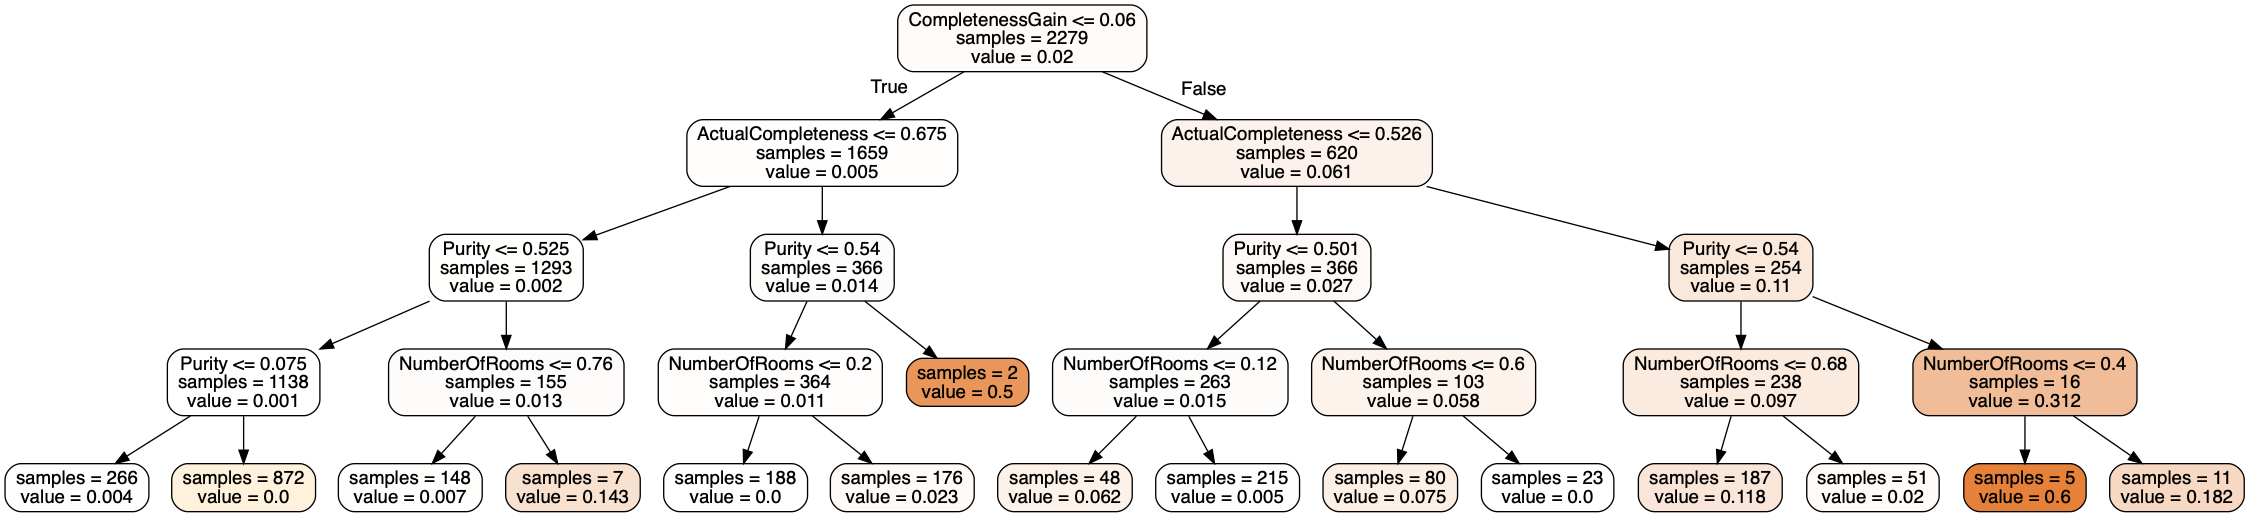

In [6]:
#pip install pydotplus
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

#### 图片保存

In [7]:
graph.write_png("data/dtr_prefill.png")

True